In [42]:
#! ls /export/space0/yang-j/img
#print(imgList[360])
!rm /export/space0/yang-j/img/cat/000163.jpg

rm: '/export/space0/yang-j/img/cat/000163.jpg' を削除できません: そのようなファイルやディレクトリはありません


In [43]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pickle

%matplotlib inline
imgPath = '/export/space0/yang-j/img/'
animal = ('cat', 'dog')
#
# read ALL filenames in the directory of imgPath
#
from PIL import Image
import glob
imgList = []
for filename in glob.glob(imgPath +animal[1]+ '/*.jpg'): #assuming gif
    imgList.append(filename)
    
for filename in glob.glob(imgPath +animal[0]+ '/*.jpg'): #assuming gif
    imgList.append(filename)
    
m = len(imgList)
print(len(imgList))
with open('/home/yanai-lab/yang-j/www/imsearch/imgPath.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(imgList, f)

368


(<matplotlib.image.AxesImage at 0x7f6230669fd0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

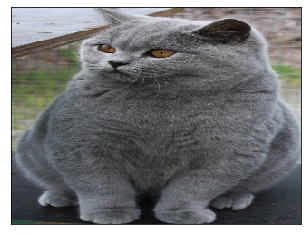

In [44]:
## resize all the images to 320x240
height = 240
width = 320
pxls = height * width

img = cv.imread(imgList[300])
img = cv.resize(img, (width, height))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img), plt.xticks([]), plt.yticks([])

#print(img)



# RGB, LUV, HSV三種類カラーヒストグラムの生成：64次元に変換

In [45]:
# 
#
# RGB, LUV, HSV三種類カラーヒストグラムの生成：64次元に変換
#
#

import numpy as np
import cv2 as cv
import pickle

# obj0, obj1, obj2 are created here...

# Saving the objects:

methodDict = {"RGB":cv.COLOR_BGR2RGB , "LUV":cv.COLOR_BGR2LUV, "HSV":cv.COLOR_BGR2HSV}
def createColorHistgram(imgList, method, isSave = False):
    if method not in methodDict:
        print('error')
        sys.exit()
        
    cmdStr = methodDict[method]
    colHist = np.zeros([m, 64], dtype = np.int64)
    for i in range(len(imgList)):
        path = imgList[i]
        img = cv.imread(path)
        img = cv.resize(img, (width, height))
        img = cv.cvtColor(img, cmdStr)
        img = (np.int64)(img / 64)
        for w in range(width):
            for h in range(height):
                idx = 1 * img[h, w, 0] + 4 * img[h, w, 1] + 16 * img[h, w, 2]
                colHist[i, idx] += 1
    if isSave:
        with open('/home/yanai-lab/yang-j/www/imsearch/featureData/'+ method + '.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump(colHist, f)
    return colHist
            
            
colHist = createColorHistgram(imgList, "RGB", True)
colHist = createColorHistgram(imgList, "HSV", True)
colHist = createColorHistgram(imgList, "LUV", True)

In [47]:
# make sure the sum of every row is 320*240 (the number of pixels in each image)
# print(np.sum(colHist, axis = 1))
# print(colHist.shape)

[76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800 76800
 76800 76800 76800 76800 76800 76800 76800 76800 76

(<matplotlib.image.AxesImage at 0x7f623062b4d0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'queryImage'))

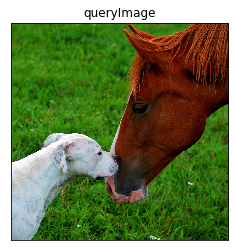

In [48]:
queryIdx = 6;
queryImg = plt.imread(imgList[queryIdx])
plt.imshow(queryImg), plt.xticks([]), plt.yticks([]), plt.title('queryImage')

In [49]:
queryHist = colHist[queryIdx, :] # get query image's color histgram

distMat = (colHist - queryHist) ** 2

In [51]:
dist  = np.sum(distMat, axis = 1)
#print(np.min(dist))

# Get the similar images in an order of whoses similiarity is from high to low
rsl = np.argsort(dist)

print(len(rsl))


368


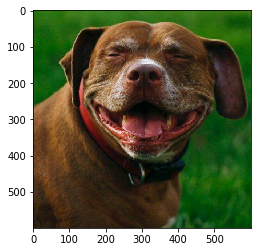

In [111]:
plt.imshow(plt.imread(imgList[115]))

# DCNN抽出

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
from PIL import Image
import time
import os
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models

# proxyの設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "9, 12"    


vgg16 = models.vgg16(pretrained=True,progress=True)
softmax=nn.Softmax(dim=1)
# pretrained=True とすると，学習済みポラメータも読み込まれる．
# ~/.cache/torch/checkpoints/ に読み込まれます．VGG16は550MBもあるので，不要になったら消去しましょう．
# ls でダウンロードされていることを確認してみます．
! ls -l ~/.cache/torch/checkpoints/ 

合計 640564
-rw------- 1 yang-j YANAI_LAB 102502400  4月 21 19:12 resnet50-19c8e357.pth
-rw------- 1 yang-j YANAI_LAB 553433881  4月 26 16:59 vgg16-397923af.pth


In [33]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
vgg16fc7 = torch.nn.Sequential(
    vgg16.features,
    vgg16.avgpool,
    Flatten(),
    *list(vgg16.classifier.children())[:-3]  # 最後の3つのlayer(relu,dropout,fc1000)を削除
)
# 表示してみます．fc7 (fc4096)が最終出力になっているはずです．
print(vgg16fc7)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [34]:
# vgg16fc7.eval()
# with torch.no_grad():
#     fc7=vgg16fc7(img)
# print(fc7.shape)     # shapeの表示
# print(fc7[0][0:100]) # fc7特徴量を最初の100次元分だけ表示してみます．

In [39]:
import glob
imglist = imgList

in_size=224
imgs = np.empty((0,in_size,in_size,3), dtype=np.float32)

for i,img_path in enumerate(imglist):
    if i%100==0:
        print("reading {}th image".format(i))
    x = np.array(Image.open(img_path).resize((in_size,in_size)), dtype=np.float32)
    x = np.expand_dims(x, axis=0)
    #print(i)
    imgs = np.vstack((imgs,x))
    
mean=np.array([0.485, 0.456, 0.406], dtype=np.float32)
std=np.array([0.229, 0.224, 0.225], dtype=np.float32)
imgs=(imgs/255.0-mean)/std
imgs=imgs.transpose(0,3,1,2)  # HWC -> CHW
img=torch.from_numpy(imgs)
print(imgs.shape)

reading 0th image
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
reading 100th image
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
reading 200th image
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262


In [40]:
# 200枚処理するので，GPUを使います．
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vgg16fc7 = vgg16fc7.to(device)

vgg16fc7.eval()
with torch.no_grad():
    fc=vgg16fc7(img.to(device)).cpu().numpy()
    # gpuで処理した結果を cpuに戻して，numpy形式にします．
print(fc.shape)     # shapeの表示

(368, 4096)


In [41]:
with open('/home/yanai-lab/yang-j/www/imsearch/featureData/DCNN.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(fc, f)

In [179]:
print(type(fc))

<class 'numpy.ndarray'>


In [181]:
!ls /home/yanai-lab/yang-j/www/imsearch/featureData/

DCNN.pkl  HSV.pkl  LUV.pkl  RGB.pkl


# CGIページソースコード

In [ ]:
# CGI sourceCode

#!/usr/local/anaconda3/bin/python3
import pickle
import numpy as np
import cgi
from PIL import Image
import glob
featurePath = '/home/yanai-lab/yang-j/www/imsearch/featureData'

def searchImages(queryIdx = 0, method = 'RGB'):
#   Search similar images similar to the image wid "queryIdx" by "method"
#   this function will return the sorted ARG as a result
#
    # preprocessing
    try:
        if method == 'RGB':
            with open('featureData/RGB.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'DCNN':
           with open('featureData/DCNN.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'HSV':
           with open('featureData/HSV.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
        elif method == 'LUV':
            with open('featureData/LUV.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
               featureHist = pickle.load(f)
    except IOError:
        print("Could not read file")

    m = featureHist.shape[0]
    if queryIdx < 0 or queryIdx >= m:
        print('Index overflow')
        sys.exit()

    # Caculating similarity
    queryHist = featureHist[queryIdx, :] # get query image's color histgram
    distMat = (featureHist - queryHist) ** 2
    dist  = np.sum(distMat, axis = 1)
    dist  = dist / np.linalg.norm(dist)

    # Get the similar images in an order of whoses similiarity is from high to low
    sortedIdx = np.argsort(dist)
    score = np.sort(dist)
    return sortedIdx, score

print("Content-type:text/html\r\n\r\n")


imgPath = 'img/'

imgList = []
for filename in glob.glob(imgPath + 'dog/*.jpg'): #assuming gif
    imgList.append(filename)
for filename in glob.glob(imgPath + 'cat/*.jpg'): #assuming gif
    imgList.append(filename)


m = len(imgList)

num_in_row = 10
row = (int)(m /num_in_row)
remain = m % num_in_row

queryIdx = 0
feature = "RGB"

link = cgi.FieldStorage()
if "queryIdx" in link:
        queryIdx = (int)(link["queryIdx"].value)
if "feature" in link:
        feature = link["feature"].value


sortedIdx, score = searchImages(queryIdx, feature)

if len(sortedIdx) != len(imgList):
        print('Need to update feature database')
        sys.exit()

print ('<html>')
print ('<head>')
print ('<title>Image Searching CGI Program</title>')
print ('</head>')

print ('<body>')
#print(sortedIdx, score)
print ('<h3>Click a picture to find the similar images and select the feature you\'d like to use below</h3>')

print('<table><tbody><tr>')
print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'RGB')  + '" METHOD = "POST">')
print('<input type="submit" value="RGB" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'LUV')  + '" METHOD = "POST">')
print('<input type="submit" value="LUV" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'HSV')  + '" METHOD = "POST">')
print('<input type="submit" value="HSV" />')
print('</form>')

print('<form action="'+ '?queryIdx=%d&feature=%s'%(queryIdx, 'DCNN')  + '" METHOD = "POST">')
print('<input type="submit" value="DCNN(vgg16 fc7)" />')
print('</form>')

print('</tr></tbody></table>')

print('<h2>Query Image</h2>')
#print(queryIdx, imgList[queryIdx])
print('<img src = "'+ imgList[queryIdx] + '" width = "120" height = "90">')

print('<hr>')
print('<h2>Related Images</h2>')
# print(row, remain)
print("<table border='5' cellspacing='1' cellpadding='2'><tbody>")
# LOOP here
for i in range(row):
        print('<tr>')
        row_num = i * 10
        for j in range(num_in_row):
                idx = row_num + j
                print("<td align='CENTER'>")
                print("<a href = '" + "?queryIdx=%d&feature=%s" %( sortedIdx[idx], feature) + "'><img src='" + imgList[sortedIdx[idx]] + "' width='120' height='90'></a>")
                print("<br>["+ str(idx) + "]:"+ str(score[idx]) + "</td>")
        print('</tr>')

if remain != 0:
        print('<tr>')
        idx = num_in_row * row - 1
        for i in range(remain):
                idx = idx + 1
                print("<td align='CENTER'>")
                print("<a href = '" + "?queryIdx=%d&feature=%s" %( sortedIdx[idx], feature) + "'><img src='" + imgList[sortedIdx[idx]] + "' width='120' height='90'></a>")
                print("<br>["+ str(idx) + "]:"+ str(score[idx]) + "</td>")
        print('</tr>')


print('</tbody></table>')
print('</body>')
print('</html>')